Puzzle: https://code.golf/partition-numbers

The nth partition number is the number of ways that n can be expressed as the sum of positive integers, where ordering does not matter.
For example, 4 can be partitioned in five distinct ways:

4
3 + 1
2 + 2
1 + 2 + 1
1 + 1 + 1 + 1

Print the first 100 partition numbers, each on a separate line.

In [225]:
# This method is a very satifying algorithm but is very inefficient for numbers greater than 40.
# Holding all the partitions in memory from the previous step and looping through them is very slow.

def add_one(t):
	yield t + (1,)
	for q in set(t):
		i = t.index(q)
		l = list(t)
		l.pop(i)
		l.insert(i, q+1)
		yield tuple(l)
  
k, _old = 1, {(1,)}
print(k, ":",len(_old))
while k < 30:
	_new = set()
	for _partition in _old:
		_new.update(add_one(_partition))
	_old = _new
	k += 1
	print(k, ":",len(_new))

1 : 1
2 : 2
3 : 3
4 : 5
5 : 7
6 : 11
7 : 15
8 : 22
9 : 30
10 : 42
11 : 56
12 : 77
13 : 101
14 : 135
15 : 176
16 : 231
17 : 297
18 : 385
19 : 490
20 : 627
21 : 792
22 : 1002
23 : 1255
24 : 1575
25 : 1958
26 : 2436
27 : 3010
28 : 3718
29 : 4565
30 : 5604


Thankfully, Euler has solved the problem for us.

$$p(n) = \sum_{k\in\mathbb{Z}\setminus\{0\}} (-1)^{k+1} p(n-k(3k-1)/2)$$



In [201]:
def pentagonal_generator():
	"""Generator for the generalised pentagonal numbers"""
	k = 1
	while True:
		yield k*(3*k-1)/2
		yield k*(3*k+1)/2
		k += 1

def pentagonal(n):
	"""Generator for the generalised pentagonal numbers up to n"""
	g = pentagonal_generator()
	r = next(g)
	while r <= n:
		yield r
		r = next(g)

In [226]:
d = {0: 1}

def p(n):
    if n in d:
        return d[n]
    s, j = 0, 0
    for t in pentagonal(n):
        s += (-1)**(j//2) * p(n-t)
        j += 1
    d[n] = s
    return s

for n in range(1, 101):
    print(p(n))

1
2
3
5
7
11
15
22
30
42
56
77
101
135
176
231
297
385
490
627
792
1002
1255
1575
1958
2436
3010
3718
4565
5604
6842
8349
10143
12310
14883
17977
21637
26015
31185
37338
44583
53174
63261
75175
89134
105558
124754
147273
173525
204226
239943
281589
329931
386155
451276
526823
614154
715220
831820
966467
1121505
1300156
1505499
1741630
2012558
2323520
2679689
3087735
3554345
4087968
4697205
5392783
6185689
7089500
8118264
9289091
10619863
12132164
13848650
15796476
18004327
20506255
23338469
26543660
30167357
34262962
38887673
44108109
49995925
56634173
64112359
72533807
82010177
92669720
104651419
118114304
133230930
150198136
169229875
190569292


In [279]:
from random import random
from math import floor
import pandas as pd


In [286]:
s = pd.Series([floor(random() * 23 + 3) for _ in range(10000)])

In [292]:
s.describe()

count    10000.000000
mean        13.969200
std          6.600213
min          3.000000
25%          8.000000
50%         14.000000
75%         20.000000
max         25.000000
dtype: float64

<Axes: >

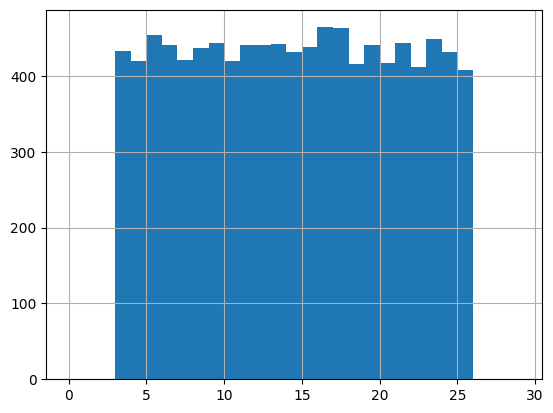

In [291]:
s.hist(bins=list(range(0, 30)))